# Importing the libraries.

In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

# Next Important step is Data Transformation.

## Data Transformations

#### We first start with defining our data transformations. We need to think what our data is and how can we augment it to correct represent images which it might not see otherwise.

### Here is the list of all the transformations which come pre-built with PyTorch

#### Compose
#### ToTensor
#### ToPILImage
#### Normalize
#### Resize
#### Scale
#### CenterCrop
#### Pad
#### Lambda
#### RandomApply
#### RandomChoice
#### RandomOrder
#### RandomCrop
#### RandomHorizontalFlip
#### RandomVerticalFlip
#### RandomResizedCrop
#### RandomSizedCrop
#### FiveCrop
#### TenCrop
#### LinearTransformation
#### ColorJitter
#### RandomRotation
#### RandomAffine
#### Grayscale
#### RandomGrayscale
#### RandomPerspective
#### RandomErasing

## Transforming our data

In [2]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(), # converting the images to tensors 
                                       transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values. 
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])

# Dataset

In [3]:
train = datasets.MNIST('./data', train=True, download=True, transform=train_transforms)
test = datasets.MNIST('./data', train=False, download=True, transform=test_transforms)

9920512it [00:01, 7422527.60it/s]                                                                                      


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw


32768it [00:00, 70495.79it/s]                                                                                          


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw


1654784it [00:00, 2914008.55it/s]                                                                                      


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw


8192it [00:00, 19340.14it/s]                                                                                           


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw
Processing...
Done!


### Now we have split our data into train and test 

# Dataloader Arguments & Test/Train Dataloaders

In [4]:
SEED = 1 # so that we get same random sample everytime.

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility --> so that we get same random sample everytime.
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


# Data Statistics - They describe the overall data.

C:\Users\RASHU TYAGI\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


[Train]
 - Numpy Shape: (60000, 28, 28)
 - Tensor Shape: torch.Size([60000, 28, 28])
 - min: tensor(-0.4242)
 - max: tensor(2.8215)
 - mean: tensor(0.0001)
 - std: tensor(1.0000)
 - var: tensor(1.0001)
torch.Size([128, 1, 28, 28])
torch.Size([128])


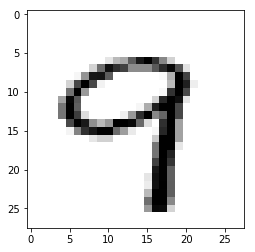

In [5]:
# We'd need to convert it into Numpy! Remember above we have converted it into tensors already

train_data = train.train_data
train_data = train.transform(train_data.numpy())

print('[Train]')
print(' - Numpy Shape:', train.train_data.cpu().numpy().shape)
print(' - Tensor Shape:', train.train_data.size())
print(' - min:', torch.min(train_data))
print(' - max:', torch.max(train_data))
print(' - mean:', torch.mean(train_data))
print(' - std:', torch.std(train_data))
print(' - var:', torch.var(train_data))

dataiter = iter(train_loader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')


## It is important that we view as many images as possible. This is required to get some idea on image augmentation later on.

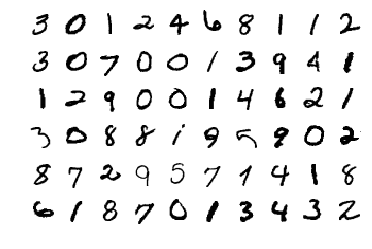

In [6]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

# How did we get those mean and std values which we used above?

### We used values like 0.1307 and 0.3081 before how did we get them ?

#### Let us run our code without those transforms.

In [7]:
# simple transform
simple_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                      #  transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values. 
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])
exp = datasets.MNIST('./data', train=True, download=True, transform=simple_transforms)
exp_data = exp.train_data
exp_data = exp.transform(exp_data.numpy())

print('[Train]')
print(' - Numpy Shape:', exp.train_data.cpu().numpy().shape)
print(' - Tensor Shape:', exp.train_data.size())
print(' - min:', torch.min(exp_data))
print(' - max:', torch.max(exp_data))
print(' - mean:', torch.mean(exp_data))
print(' - std:', torch.std(exp_data))
print(' - var:', torch.var(exp_data))

C:\Users\RASHU TYAGI\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


[Train]
 - Numpy Shape: (60000, 28, 28)
 - Tensor Shape: torch.Size([60000, 28, 28])
 - min: tensor(0.)
 - max: tensor(1.)
 - mean: tensor(0.1307)
 - std: tensor(0.3081)
 - var: tensor(0.0949)


## As you can clearly see that when we did not apply those transformations then we are receiving our mean and standard deviations as 0.1307 and 0.3081 and when we standardize our data we make mean  = 0 and standard deviation as 1 hence we are using these values so that these factors get subtracted out from there.

# Model

#### Starting with the simplest model without thinking much actually.

In [8]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1) #input - 28*28*1 Output-28*28*32  RF-3*3
        
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1) #input - 28*28*32 Output-28*28*64  RF-5*5
        
        self.pool1 = nn.MaxPool2d(2, 2) #input - 24*24*64 Output-24*24*64  RF-4*4
        
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1) #input - 14*14*64 Output-14*14*128  RF-8*8
        
        self.conv4 = nn.Conv2d(128, 256, 3, padding=1) #input - 14*14*128 Output-14*14*256  RF-12*12
        
        self.pool2 = nn.MaxPool2d(2, 2) #input - 14*14*256 Output-7*7*256  RF-14*14
        
        self.conv5 = nn.Conv2d(256, 512, 3) #input - 7*7*256 Output-5*5*512  RF-18*18
        
        self.conv6 = nn.Conv2d(512, 1024, 3) #input - 5*5*512 Output-3*3*1024  RF-26*26
        
        self.conv7 = nn.Conv2d(1024, 10, 3) #input - 3*3*1024 Output- 1*1*10  RF-34*34

    def forward(self, x):
        x = self.pool1(F.relu(self.conv2(F.relu(self.conv1(x)))))
        x = self.pool2(F.relu(self.conv4(F.relu(self.conv3(x)))))
        x = F.relu(self.conv6(F.relu(self.conv5(x))))
        # x = F.relu(self.conv7(x))
        x = self.conv7(x)
        x = x.view(-1, 10)
        return F.log_softmax(x, dim=-1)

## It is important to view the model summary and the model parameters and as there is not inbuilt function hence we do it using the following code

In [9]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
            Conv2d-2           [-1, 64, 28, 28]          18,496
         MaxPool2d-3           [-1, 64, 14, 14]               0
            Conv2d-4          [-1, 128, 14, 14]          73,856
            Conv2d-5          [-1, 256, 14, 14]         295,168
         MaxPool2d-6            [-1, 256, 7, 7]               0
            Conv2d-7            [-1, 512, 5, 5]       1,180,160
            Conv2d-8           [-1, 1024, 3, 3]       4,719,616
            Conv2d-9             [-1, 10, 1, 1]          92,170
Total params: 6,379,786
Trainable params: 6,379,786
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 1.51
Params size (MB): 24.34
Estimated Total Size (MB): 25.85
--------------------------------

### So we can see that we have 6.3 Million parameters which is too much to be honest and thats alright we will try to improve on that slowly as we move ahead.

# Train and Test Functions.

In [10]:
from tqdm import tqdm

train_losses = []
test_losses = []
train_acc = []
test_acc = []

def train(model, device, train_loader, optimizer, epoch):
  model.train()
  pbar = tqdm(train_loader)
  correct = 0
  processed = 0
  for batch_idx, (data, target) in enumerate(pbar):
    # get samples
    data, target = data.to(device), target.to(device)

    # Init
    optimizer.zero_grad()
    # In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch accumulates the gradients on subsequent backward passes. 
    # Because of this, when you start your training loop, ideally you should zero out the gradients so that you do the parameter update correctly.

    # Predict
    y_pred = model(data)

    # Calculate loss
    loss = F.nll_loss(y_pred, target)
    train_losses.append(loss)

    # Backpropagation
    loss.backward()
    optimizer.step()

    # Update pbar-tqdm
    
    pred = y_pred.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    correct += pred.eq(target.view_as(pred)).sum().item()
    processed += len(data)

    pbar.set_description(desc= f'Loss={loss.item()} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')
    train_acc.append(100*correct/processed)

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
    test_acc.append(100. * correct / len(test_loader.dataset))

In [11]:
model =  Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

EPOCH: 0


Loss=0.018807614222168922 Batch_id=468 Accuracy=82.79: 100%|█████████████████████████| 469/469 [00:16<00:00, 27.59it/s]



Test set: Average loss: 0.0614, Accuracy: 9791/10000 (97.91%)

EPOCH: 1


Loss=0.0038709889631718397 Batch_id=468 Accuracy=98.18: 100%|████████████████████████| 469/469 [00:16<00:00, 27.77it/s]



Test set: Average loss: 0.0429, Accuracy: 9867/10000 (98.67%)

EPOCH: 2


Loss=0.007956971414387226 Batch_id=468 Accuracy=98.90: 100%|█████████████████████████| 469/469 [00:17<00:00, 27.47it/s]



Test set: Average loss: 0.0327, Accuracy: 9889/10000 (98.89%)

EPOCH: 3


Loss=0.026471560820937157 Batch_id=468 Accuracy=99.20: 100%|█████████████████████████| 469/469 [00:17<00:00, 28.62it/s]



Test set: Average loss: 0.0294, Accuracy: 9905/10000 (99.05%)

EPOCH: 4


Loss=0.04429765045642853 Batch_id=468 Accuracy=99.39: 100%|██████████████████████████| 469/469 [00:17<00:00, 27.26it/s]



Test set: Average loss: 0.0325, Accuracy: 9897/10000 (98.97%)

EPOCH: 5


Loss=0.014256204478442669 Batch_id=468 Accuracy=99.48: 100%|█████████████████████████| 469/469 [00:16<00:00, 29.14it/s]



Test set: Average loss: 0.0340, Accuracy: 9894/10000 (98.94%)

EPOCH: 6


Loss=0.004682640079408884 Batch_id=468 Accuracy=99.60: 100%|█████████████████████████| 469/469 [00:17<00:00, 27.44it/s]



Test set: Average loss: 0.0267, Accuracy: 9915/10000 (99.15%)

EPOCH: 7


Loss=0.016140803694725037 Batch_id=468 Accuracy=99.67: 100%|█████████████████████████| 469/469 [00:16<00:00, 27.69it/s]



Test set: Average loss: 0.0317, Accuracy: 9905/10000 (99.05%)

EPOCH: 8


Loss=0.00014020006346981972 Batch_id=468 Accuracy=99.77: 100%|███████████████████████| 469/469 [00:16<00:00, 27.59it/s]



Test set: Average loss: 0.0264, Accuracy: 9911/10000 (99.11%)

EPOCH: 9


Loss=0.015417218208312988 Batch_id=468 Accuracy=99.76: 100%|█████████████████████████| 469/469 [00:16<00:00, 27.62it/s]



Test set: Average loss: 0.0327, Accuracy: 9912/10000 (99.12%)

EPOCH: 10


Loss=0.0008873144979588687 Batch_id=468 Accuracy=99.81: 100%|████████████████████████| 469/469 [00:17<00:00, 28.18it/s]



Test set: Average loss: 0.0301, Accuracy: 9913/10000 (99.13%)

EPOCH: 11


Loss=0.0005614559049718082 Batch_id=468 Accuracy=99.91: 100%|████████████████████████| 469/469 [00:17<00:00, 28.46it/s]



Test set: Average loss: 0.0324, Accuracy: 9916/10000 (99.16%)

EPOCH: 12


Loss=0.0072792768478393555 Batch_id=468 Accuracy=99.93: 100%|████████████████████████| 469/469 [00:17<00:00, 27.01it/s]



Test set: Average loss: 0.0331, Accuracy: 9918/10000 (99.18%)

EPOCH: 13


Loss=0.00042920312262140214 Batch_id=468 Accuracy=99.94: 100%|███████████████████████| 469/469 [00:17<00:00, 28.69it/s]



Test set: Average loss: 0.0395, Accuracy: 9908/10000 (99.08%)

EPOCH: 14


Loss=0.00027019777917303145 Batch_id=468 Accuracy=99.94: 100%|███████████████████████| 469/469 [00:17<00:00, 28.59it/s]



Test set: Average loss: 0.0326, Accuracy: 9930/10000 (99.30%)

EPOCH: 15


Loss=0.0009810725459828973 Batch_id=468 Accuracy=99.97: 100%|████████████████████████| 469/469 [00:17<00:00, 28.48it/s]



Test set: Average loss: 0.0305, Accuracy: 9931/10000 (99.31%)

EPOCH: 16


Loss=0.00046979388571344316 Batch_id=468 Accuracy=99.99: 100%|███████████████████████| 469/469 [00:17<00:00, 28.46it/s]



Test set: Average loss: 0.0303, Accuracy: 9941/10000 (99.41%)

EPOCH: 17


Loss=2.1656353510479676e-06 Batch_id=468 Accuracy=99.98: 100%|███████████████████████| 469/469 [00:17<00:00, 28.86it/s]



Test set: Average loss: 0.0312, Accuracy: 9929/10000 (99.29%)

EPOCH: 18


Loss=5.304813385009766e-06 Batch_id=468 Accuracy=99.99: 100%|████████████████████████| 469/469 [00:17<00:00, 27.20it/s]



Test set: Average loss: 0.0313, Accuracy: 9929/10000 (99.29%)

EPOCH: 19


Loss=0.00011949738109251484 Batch_id=468 Accuracy=100.00: 100%|██████████████████████| 469/469 [00:17<00:00, 27.47it/s]



Test set: Average loss: 0.0321, Accuracy: 9934/10000 (99.34%)



Text(0.5, 1.0, 'Test Accuracy')

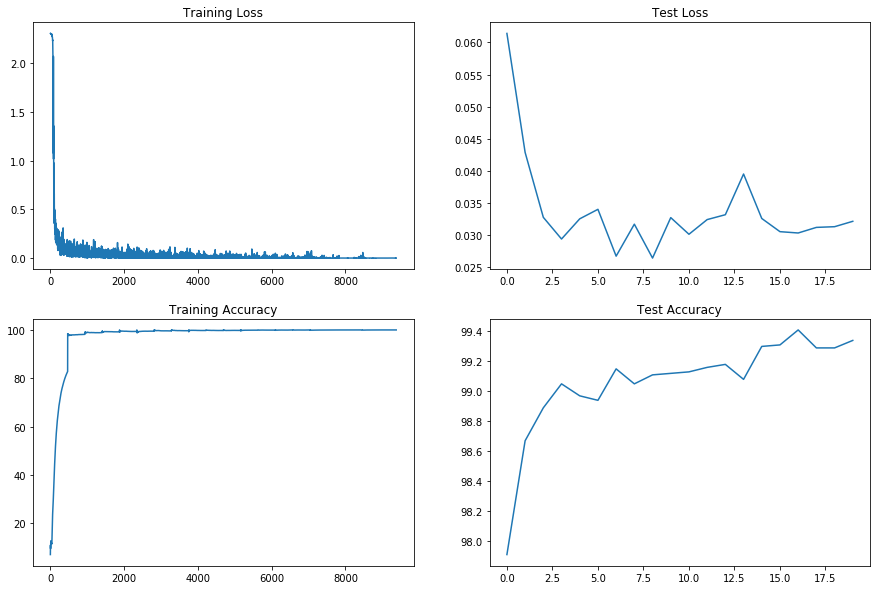

In [12]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

# Results :-

### 1.) Best Training Accuracy: 99.99%
### 2.) Best Test Accuracy : 99.41%
### 3.) Number of parameters : 6.3 Million.

### As we can see that our best training accuracy is 99.99% and the best test accuracy is only 99.41% it means that our model cannot be pushed furthur as it has already achieved such a high training accuracy of 99.4% already and has a great gap from the test accuracy hence the model is OVERFITTING.

## Also note that as we are using 6.3 million parameters for such a simple use case hence we can say that it is Extremely Heavy Model for such a problem.

### Switch to Round 2 where we try to improve the things furthur.